In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


Loading the dataset

In [55]:
df= pd.read_csv('../data/Preprocessed_RedWineQuality.csv')
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acidity,sulphates_squared,citric_acid_ratio,sugar_acid_diff,Quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10,0.3136,0.000000,-5.5,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,8.68,0.4624,0.000000,-5.2,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,8.56,0.4225,0.005128,-5.5,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,11.48,0.3364,0.050000,-9.3,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10,0.3136,0.000000,-5.5,5



Preparing dataset for model building


In [56]:
x = df.drop(columns='Quality')
y = df['Quality']



In [10]:
x

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acidity,sulphates_squared,citric_acid_ratio,sugar_acid_diff
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,8.100,0.3136,0.000000,-5.5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,8.680,0.4624,0.000000,-5.2
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,8.560,0.4225,0.005128,-5.5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,11.480,0.3364,0.050000,-9.3
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,8.100,0.3136,0.000000,-5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,6.800,0.3364,0.012903,-4.2
1447,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.450,0.5776,0.016949,-3.7
1448,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.810,0.5625,0.020635,-4.0
1449,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,6.545,0.5041,0.020339,-3.9


In [57]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1446    5
1447    6
1448    6
1449    5
1450    6
Name: Quality, Length: 1451, dtype: int64

Adding normalisation layer

In [113]:
normalization_layer = tf.keras.layers.Normalization(axis=-1)
normalization_layer.adapt(x.to_numpy())

split the data into Training,cross-validation and testing

In [114]:
x_train_val,x_test,y_train_val,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_cv,y_train,y_cv = train_test_split(x_train_val,y_train_val,test_size=0.25,random_state=42)


In [124]:
input_size = x_train.shape[1]
model = Sequential([
    
    normalization_layer,
     Dense(400, input_shape=(input_size,), activation='relu'),
    Dense(200, activation='sigmoid'),
    Dense(100, activation='relu'),
    Dense(50,activation='sigmoid'),
    Dense(25,activation='relu'),
    Dense(1,activation='relu')

])
model.compile(optimizer ='adam',
              loss = 'mse',
              metrics = ['mae']
              )
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_cv,y_cv),callbacks=[early_stopping])



Epoch 1/50


/Volumes/Code/RedWineQuality/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 15.1826 - mae: 3.5802 - val_loss: 0.6740 - val_mae: 0.6959
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6431 - mae: 0.6536 - val_loss: 0.6095 - val_mae: 0.6523
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5900 - mae: 0.6629 - val_loss: 0.6059 - val_mae: 0.6618
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5492 - mae: 0.6389 - val_loss: 0.5840 - val_mae: 0.6467
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5333 - mae: 0.6286 - val_loss: 0.5519 - val_mae: 0.6251
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5017 - mae: 0.6015 - val_loss: 0.4880 - val_mae: 0.5658
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4371 - mae: 0.5373 - val_loss: 0.4448 - val_mae: 0.5304
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3908 - mae: 0.4854 - val_loss: 0.4176 - val_mae: 0.5069
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4103 - mae: 0.4964 - v

Prediction of model on cv set and training set and testing set

In [125]:
y_cv_pred = model.predict(x_cv)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


checking the predictions on cv set 

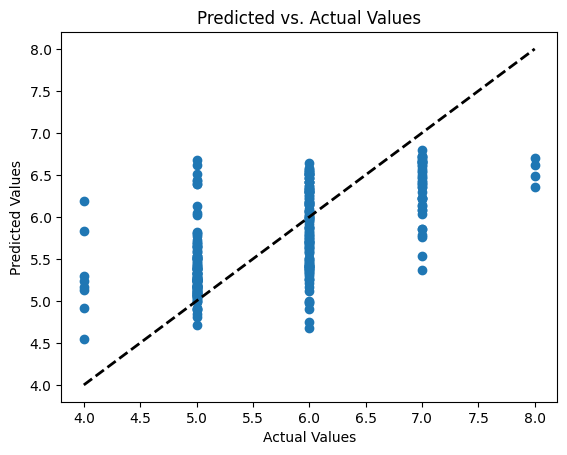

In [126]:
plt.scatter(y_cv, y_cv_pred)
plt.plot([y_cv.min(), y_cv.max()], [y_cv.min(), y_cv.max()], 'k--', lw=2)  # Diagonal line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

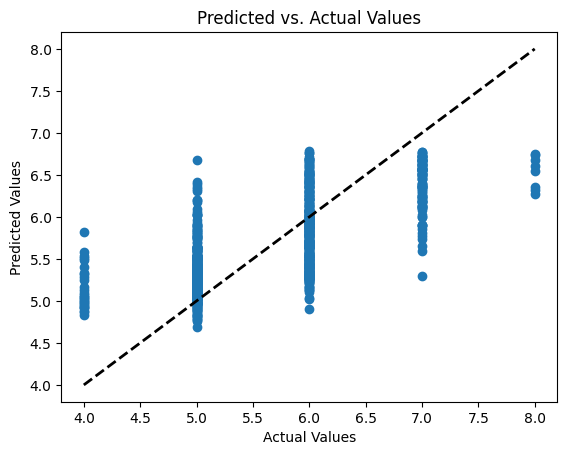

In [127]:
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

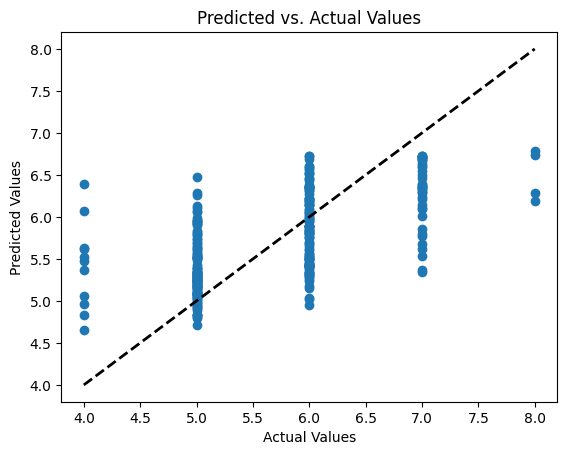

In [128]:
plt.scatter(y_test,y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Evaluationg model on test Set

In [131]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4086 - mae: 0.5016 
Test Loss: 0.40528109669685364, Test Accuracy: 0.4956499934196472


Calculatting Genralisation error

In [132]:
train_loss = history.history['loss'][-1]
generalization_error = test_loss - train_loss
print(f"Generalization Error: {generalization_error}")

Generalization Error: 0.13071638345718384


dumping the model

In [133]:
joblib.dump(model,'../model/neuralnetwork.pkl')

['../model/neuralnetwork.pkl']